<a id="ref1"></a>
<h1>Linear Regression</h1>

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

First importing the required packages:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.patches as mpatches
%matplotlib inline


Lets define the independent variable

In [3]:
# numpy arange generates numbers from start to end(excluded) depending on the steps

X = np.arange(0, 5, 0.1) 
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

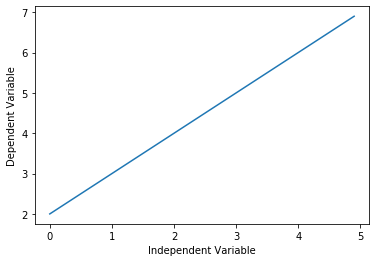

In [4]:
# Adding slope and intercept to verify changes in graph
a = 1
b = 2

Y = a*X + b

plt.plot(X, Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

OK... but how can we see this concept of linear relations with a more meaningful point of view?

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:

$$Distance Traveled = Speed \times Time + Initial Distance$$

$$Speed = Acceleration \times Time + Initial Speed$$

They are also used to describe properties of different materials:



$$Force = Deformation \times Stiffness$$

$$Heat Transfered = Temperature Difference \times Thermal Conductivity$$

$$Electrical Tension (Voltage) = Electrical Current \times Resistance$$

$$Mass =  Volume \times Density$$


When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?

----------

### Linear Regression with TensorFlow

A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 

In [5]:
df = pd.read_csv('Data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, __train_x__ and __train_y__:

In [6]:
# Convert the input to an ndarray
train_x = np.asanyarray(df['ENGINESIZE'])
train_y = np.asanyarray(df['CO2EMISSIONS'])

In [7]:
print('train_x :\n%s'%train_x[:10])
print('train_y :\n%s'%train_y[:10])

train_x :
[2.  2.4 1.5 3.5 3.5 3.5 3.5 3.7 3.7 2.4]
train_y :
[196 221 136 255 244 230 232 255 267 212]


First, we initialize the variables __a__ and __b__, with any random guess, and then we define the linear function:

In [8]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [9]:
# computes the average of loss squared, 
# y is predicted and train_y is actual output
loss = tf.reduce_mean(tf.square(y - train_y))

Then, we define the __optimizer method__. The __gradient Descent optimizer__ takes in parameter: 
* learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, with a high learning rate the training model converges quickly, but there is a risk that a high learning rate causes instability and the model will not converge. 

_Please feel free to make changes to learning parameter and check its effect_. On the other hand decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. You should note that the solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution. Please review other material for further information on the optimization. Here we will use a simple gradient descent with a learning rate of 0.05: <br>  

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the <b>.minimize()</b> which will minimize the error function of our optimizer, resulting in a better model.

In [11]:
train = optimizer.minimize(loss)

Initilializing the variables

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph

In [13]:
loss_values = []
train_data = []
for step in range(1000):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])
    

0 26992.594 77.07106 46.110275
5 1891.7205 58.84462 47.59573
10 1762.7241 57.65104 53.019833
15 1653.5897 56.36652 58.023922
20 1559.0441 55.172844 62.68204
25 1477.1372 54.061794 67.01765
30 1406.179 53.027664 71.05309
35 1344.7057 52.065136 74.809135
40 1291.4506 51.169243 78.30512
45 1245.3145 50.33538 81.559074
50 1205.3451 49.55925 84.58775
55 1170.7189 48.83685 87.40674
60 1140.7214 48.164467 90.03055
65 1114.734 47.53864 92.472694
70 1092.2203 46.956135 94.74576
75 1072.7163 46.413967 96.86146
80 1055.8193 45.909332 98.83067
85 1041.1812 45.439632 100.66355
90 1028.4996 45.002453 102.36953
95 1017.5135 44.595547 103.95739
100 1007.99603 44.216812 105.43532
105 999.75037 43.864296 106.81092
110 992.6073 43.53619 108.091286
115 986.41907 43.230793 109.283005
120 981.0582 42.946545 110.39222
125 976.4136 42.681976 111.424644
130 972.39014 42.435722 112.38558
135 968.90405 42.20652 113.27999
140 965.88446 41.993187 114.11248
145 963.26843 41.79462 114.88733
150 961.0018 41.609806 11

Lets plot the loss values to see how it has changed during the training:

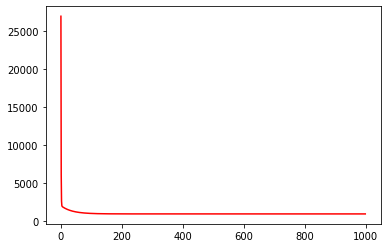

In [14]:
plt.plot(loss_values, 'r')

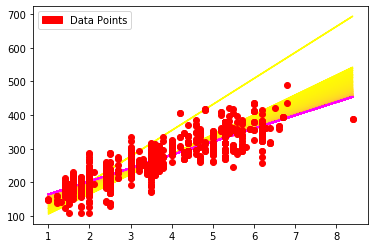

In [15]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

---------------------------
<strong> Now lets try with multiple variables </strong>

1. Engine Size
2. Cylinders

In [16]:
# Convert the input to an ndarray
x1 = np.asanyarray(df['ENGINESIZE'])
x2 = np.asanyarray(df['CYLINDERS'])
train_y = np.asanyarray(df['CO2EMISSIONS'])

In [17]:
print('x1 :\n%s'%x1[:10])
print('x2 :\n%s'%x2[:10])
print('train_y :\n%s'%train_y[:10])

x1 :
[2.  2.4 1.5 3.5 3.5 3.5 3.5 3.7 3.7 2.4]
x2 :
[4 4 4 6 6 6 6 6 6 4]
train_y :
[196 221 136 255 244 230 232 255 267 212]


First, we initialize the variables __a1__, __a2__ and __b__, with any random guess, and then we define the linear function:

In [18]:
a1 = tf.Variable(20.0)
a2 = tf.Variable(10.0)
b = tf.Variable(30.2)
y = a1 * x1 + a2 * x2 + b

In [19]:
# Loss computer
loss = tf.reduce_mean(tf.square(y - train_y))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.009)

In [21]:
train = optimizer.minimize(loss)

In [22]:
# Initializing the variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [23]:
loss_values = []
train_data = []
for step in range(300):
    _, loss_val, a1_val, a2_val, b_val = sess.run([train, loss, a1, a2, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val)
        train_data.append([a1_val, a2_val, b_val])
  

0 11250.091
5 1397.6748
10 1385.3276
15 1373.4766
20 1362.0972
25 1351.1685
30 1340.6683
35 1330.5765
40 1320.8743
45 1311.5421
50 1302.564
55 1293.9222
60 1285.6024
65 1277.588
70 1269.8661
75 1262.4221
80 1255.244
85 1248.3191
90 1241.6362
95 1235.1842
100 1228.9521
105 1222.93
110 1217.1091
115 1211.4799
120 1206.0336
125 1200.7627
130 1195.6584
135 1190.7142
140 1185.9227
145 1181.2775
150 1176.7715
155 1172.3994
160 1168.1553
165 1164.0338
170 1160.0289
175 1156.137
180 1152.352
185 1148.6703
190 1145.0875
195 1141.5996
200 1138.202
205 1134.8915
210 1131.6646
215 1128.5183
220 1125.4489
225 1122.4536
230 1119.5292
235 1116.6736
240 1113.8834
245 1111.1564
250 1108.4902
255 1105.8827
260 1103.3317
265 1100.8352
270 1098.3907
275 1095.9967
280 1093.6517
285 1091.3531
290 1089.1006
295 1086.8914


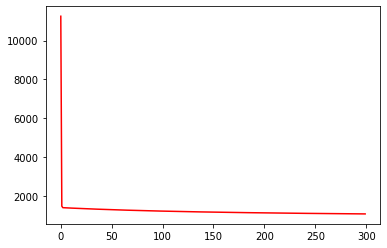

In [24]:
plt.plot(loss_values, 'r')